### Análise de Mercado SNC-Lavalin

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import DataReader as wb
from quandl import get as qdl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('bmh')

,SNC.TO,TD,^BVSP,VALE3.SA,BTCUSD=X,GC=F,BRLUSD=X,IronOre
count,622.000000,611.000000,592.000000,592.000000,551.000000,605.000000,551.000000,606.000000
mean,37.204190,51.852730,91697.712772,47.981730,7598.408508,1393.146942,0.254632,79.673944
std,13.941329,4.425308,12469.940711,4.826508,2437.267315,158.629001,0.031281,12.089075
min,15.461376,33.382996,63570.000000,34.099998,3242.484375,1176.199951,0.169883,61.600000
25%,24.000743,51.121538,81508.500000,44.701027,6319.405518,1282.000000,0.241170,68.362500
50%,34.008430,52.896481,90518.000000,48.529068,7624.909180,1326.400024,0.257772,80.145000
75%,52.341807,54.769299,101151.500000,51.205673,9271.754883,1502.199951,0.268215,87.312500
max,59.518909,56.965736,119528.000000,60.594360,17429.498047,1769.400024,0.317955,112.080000


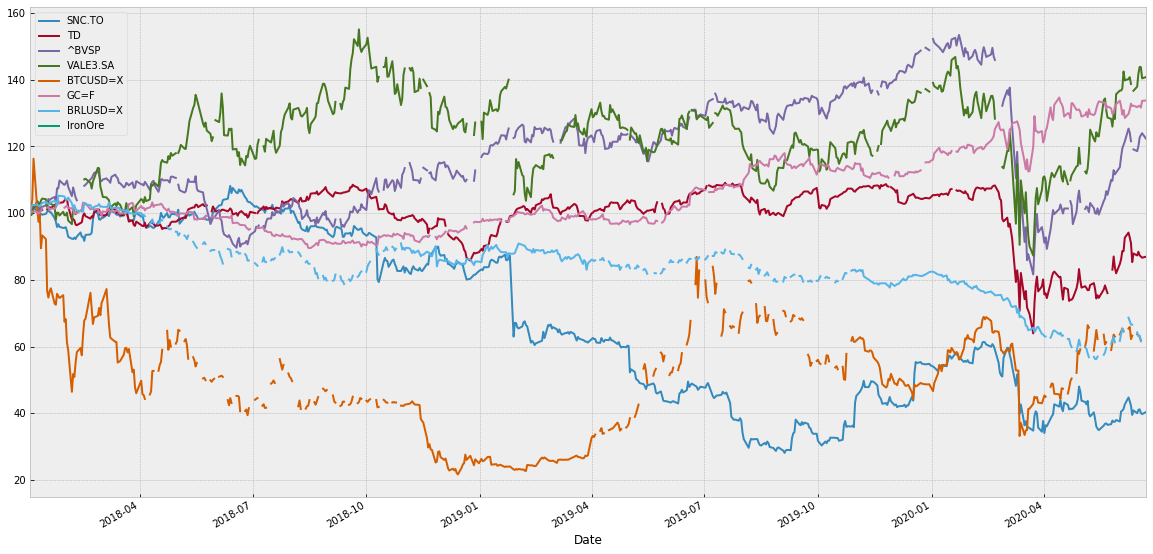

In [2]:
tickers = ['SNC.TO', 'TD', '^BVSP', 'VALE3.SA', 'BTCUSD=X', 'GC=F', 'BRLUSD=X']
df = pd.DataFrame()
for t in tickers:
    try:
        df[t] = wb(t, data_source='yahoo', start='2018-01-01')['Adj Close']
    except:
        pass

df['IronOre'] = qdl('CHRIS/CME_TIO3-Iron-Ore-62-Fe-CFR-China-TSI-Futures-Continuous-Contract-3-TIO3')['Settle']

(df / df.iloc[0] * 100).plot(figsize=(20,10))
df.describe()

In [3]:
df.tail(7)

,SNC.TO,TD,^BVSP,VALE3.SA,BTCUSD=X,GC=F,BRLUSD=X,IronOre
Date,,,,,,,,
2020-06-12,22.469999,45.900002,92795.000000,53.400002,NaN,1737.300049,NaN,99.00
2020-06-15,22.010000,45.590000,92376.000000,53.880001,9538.025391,1731.400024,0.194054,97.45
2020-06-16,22.549999,46.169998,93531.000000,55.389999,9482.974609,1735.400024,0.190709,99.30
2020-06-17,22.660000,45.610001,95547.000000,56.200001,9412.436523,1736.900024,0.191281,97.98
2020-06-18,22.040001,45.419998,96125.000000,56.169998,9274.365234,1729.800049,0.185970,97.15
2020-06-19,21.860001,45.240002,96572.000000,54.849998,NaN,1756.199951,NaN,97.49
2020-06-22,22.190001,45.389999,95335.960938,55.000000,NaN,1757.599976,0.190204,NaN


In [4]:
log_returns = np.log(df / df.shift(1))

std_returns = log_returns.std()

var_returns = log_returns.var() * 250 ** 0.5

cov_returns = log_returns.cov() * 250

cor_returns = log_returns.corr()

In [5]:
log_returns.tail()

,SNC.TO,TD,^BVSP,VALE3.SA,BTCUSD=X,GC=F,BRLUSD=X,IronOre
Date,,,,,,,,
2020-06-16,0.024238,0.012642,0.012426,0.027640,-0.005788,0.002308,-0.017388,0.018806
2020-06-17,0.004866,-0.012203,0.021325,0.014518,-0.007466,0.000864,0.002999,-0.013382
2020-06-18,-0.027742,-0.004175,0.006031,-0.000534,-0.014778,-0.004096,-0.028158,-0.008507
2020-06-19,-0.008201,-0.003971,0.004639,-0.023781,NaN,0.015147,NaN,0.003494
2020-06-22,0.014983,0.003310,-0.012882,0.002731,NaN,0.000797,NaN,NaN


In [6]:
std_returns * 100

SNC.TO      3.323610
TD          1.820359
^BVSP       2.068133
VALE3.SA    2.700349
BTCUSD=X    4.930400
GC=F        0.974737
BRLUSD=X    1.051656
IronOre     1.956573
dtype: float64

In [7]:
var_returns * 100

SNC.TO      1.746587
TD          0.523943
^BVSP       0.676281
VALE3.SA    1.152948
BTCUSD=X    3.843566
GC=F        0.150226
BRLUSD=X    0.174871
IronOre     0.605288
dtype: float64

In [8]:
cov_returns

,SNC.TO,TD,^BVSP,VALE3.SA,BTCUSD=X,GC=F,BRLUSD=X,IronOre
SNC.TO,0.276160,0.073379,0.072766,0.075775,0.080205,-0.001613,0.014713,0.013398
TD,0.073379,0.082843,0.072054,0.080939,0.061222,-0.001466,0.007829,0.015638
^BVSP,0.072766,0.072054,0.106929,0.096707,0.080493,-0.001252,0.010072,0.011957
VALE3.SA,0.075775,0.080939,0.096707,0.182297,0.083740,-0.000033,0.004666,0.037682
BTCUSD=X,0.080205,0.061222,0.080493,0.083740,0.607721,0.007698,0.006924,0.006426
GC=F,-0.001613,-0.001466,-0.001252,-0.000033,0.007698,0.023753,-0.000407,-0.004137
BRLUSD=X,0.014713,0.007829,0.010072,0.004666,0.006924,-0.000407,0.027650,0.000971
IronOre,0.013398,0.015638,0.011957,0.037682,0.006426,-0.004137,0.000971,0.095704


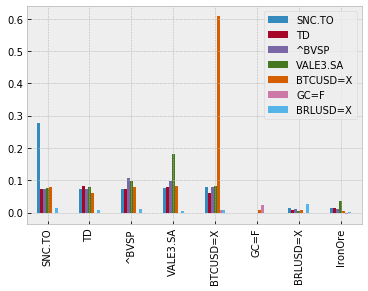

In [9]:
cov_returns[tickers].plot(kind='bar')

In [10]:
cor_returns

,SNC.TO,TD,^BVSP,VALE3.SA,BTCUSD=X,GC=F,BRLUSD=X,IronOre
SNC.TO,1.000000,0.478546,0.458908,0.366003,0.182412,-0.019524,0.156733,0.080905
TD,0.478546,1.000000,0.753636,0.649822,0.253873,-0.032872,0.150437,0.174687
^BVSP,0.458908,0.753636,1.000000,0.692662,0.296309,-0.024184,0.173171,0.116380
VALE3.SA,0.366003,0.649822,0.692662,1.000000,0.237624,-0.000485,0.061844,0.282054
BTCUSD=X,0.182412,0.253873,0.296309,0.237624,1.000000,0.063011,0.053378,0.026990
GC=F,-0.019524,-0.032872,-0.024184,-0.000485,0.063011,1.000000,-0.015282,-0.086493
BRLUSD=X,0.156733,0.150437,0.173171,0.061844,0.053378,-0.015282,1.000000,0.019100
IronOre,0.080905,0.174687,0.116380,0.282054,0.026990,-0.086493,0.019100,1.000000


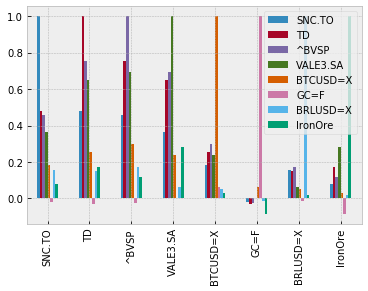

In [11]:
cor_returns.plot(kind='bar')

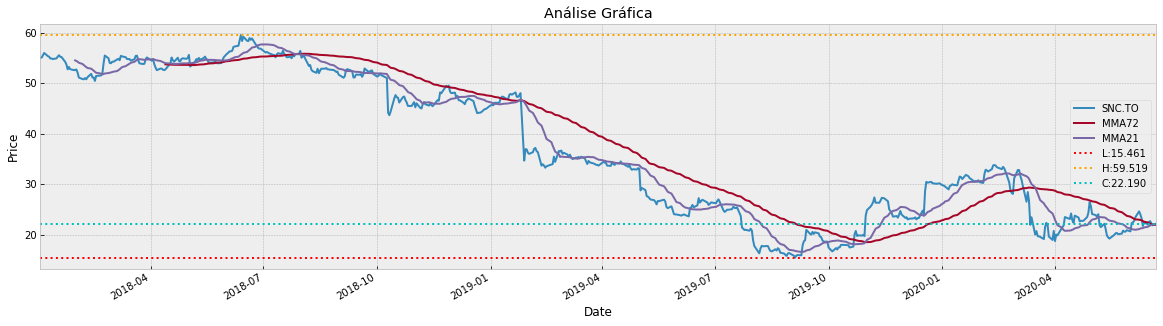

In [12]:
df[tickers[0]].plot(figsize=(20,5))
df[tickers[0]].rolling(72).mean().plot(label='MMA72')
df[tickers[0]].rolling(21).mean().plot(label='MMA21')

plt.axhline(df[tickers[0]].min(), color='r', linestyle=':', label=f'L:{df[tickers[0]].min():0.3f}')
plt.axhline(df[tickers[0]].max(), color='orange', linestyle=':', label=f'H:{df[tickers[0]].max():0.3f}')
plt.axhline(df[tickers[0]].iloc[-1], color='c', linestyle=':', label=f'C:{df[tickers[0]].iloc[-1]:0.3f}')

plt.title('Análise Gráfica')

plt.ylabel('Price')

plt.legend()

plt.show()